In [1]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [6]:
df = pd.read_csv('../dataset/2020-01-road-1-in.csv',parse_dates=["datetime"])
# df = df.drop(['all_units','samecell_units','max_speed','avg_traveltime','max_traveltime'],axis=1)
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime
0,2020-01-01 00:00:44,1,19,in,0,0,1,0,0,0,0,0
1,2020-01-01 00:00:44,1,25,in,0,0,2,0,0,0,0,0
2,2020-01-01 00:00:44,1,26,in,3,3,0,0,87,97,44,60
3,2020-01-01 00:00:44,1,27,in,1,1,0,0,3,3,75,75
4,2020-01-01 00:00:44,1,28,in,2,1,3,1,27,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24673553,2020-01-31 23:59:28,1,893,in,1,1,0,0,10,10,60,60
24673554,2020-01-31 23:59:28,1,894,in,0,0,1,0,0,0,0,0
24673555,2020-01-31 23:59:28,1,929,in,1,0,0,1,40,40,0,0
24673556,2020-01-31 23:59:28,1,944,in,1,1,0,0,50,50,59,59


In [7]:
df['inflow_units_N'] = (df["inflow_units"] - df["inflow_units"].min()) / (df["inflow_units"].max() - df["inflow_units"].min())
df['outflow_units_N'] = (df["outflow_unit"] - df["outflow_unit"].min()) / (df["outflow_unit"].max() - df["outflow_unit"].min())
df['avg_speed_N'] = (df["avg_speed"] - df["avg_speed"].min()) / (df["avg_speed"].max() - df["avg_speed"].min())
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N
0,2020-01-01 00:00:44,1,19,in,0,0,1,0,0,0,0,0,0.000000,0.020833,0.000000
1,2020-01-01 00:00:44,1,25,in,0,0,2,0,0,0,0,0,0.000000,0.041667,0.000000
2,2020-01-01 00:00:44,1,26,in,3,3,0,0,87,97,44,60,0.066667,0.000000,0.360996
3,2020-01-01 00:00:44,1,27,in,1,1,0,0,3,3,75,75,0.022222,0.000000,0.012448
4,2020-01-01 00:00:44,1,28,in,2,1,3,1,27,27,0,0,0.022222,0.062500,0.112033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673553,2020-01-31 23:59:28,1,893,in,1,1,0,0,10,10,60,60,0.022222,0.000000,0.041494
24673554,2020-01-31 23:59:28,1,894,in,0,0,1,0,0,0,0,0,0.000000,0.020833,0.000000
24673555,2020-01-31 23:59:28,1,929,in,1,0,0,1,40,40,0,0,0.000000,0.000000,0.165975
24673556,2020-01-31 23:59:28,1,944,in,1,1,0,0,50,50,59,59,0.022222,0.000000,0.207469


In [ ]:
# sns.pairplot(df,vars=['inflow_units_N','outflow_units_N','avg_speed_N'],hue="cluster")

In [ ]:
# fig = px.scatter_matrix(df.drop(["datetime","road_number","km","direction","inflow_units","outflow_unit","avg_speed"],axis=1),width=600, height=1000)
# fig.show()

In [4]:
df.max(axis=0)

datetime           2020-01-31 23:30:00
km                               124.0
all_units                         65.5
inflow_units                      30.0
outflow_unit                 32.266667
samecell_units                    38.0
avg_speed                         98.0
max_speed                        118.0
avg_traveltime                   256.0
max_traveltime                   268.0
road_number                          7
road_direction                      in
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
dtype: object

In [5]:
X = df[['inflow_units_N','outflow_units_N','avg_speed_N']].values
X

array([[0.08      , 0.        , 0.80208333],
       [0.09130435, 0.        , 0.76690821],
       [0.08518519, 0.        , 0.81095679],
       ...,
       [0.03333333, 0.        , 0.47222222],
       [0.03333333, 0.        , 0.72222222],
       [0.03333333, 0.        , 0.84722222]])

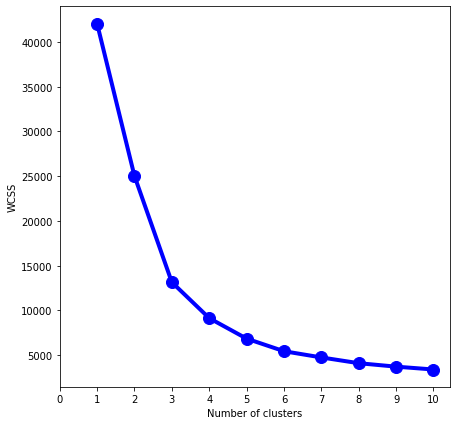

In [15]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
model = KMeans(n_clusters = 5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
df['cluster'] = y_clusters
y_clusters

array([3, 3, 3, ..., 0, 3, 3])

C:\Users\NITIKORN\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

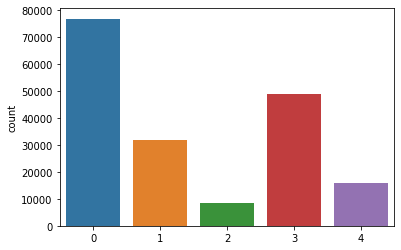

In [7]:
sns.countplot(y_clusters)

In [ ]:
X

In [ ]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

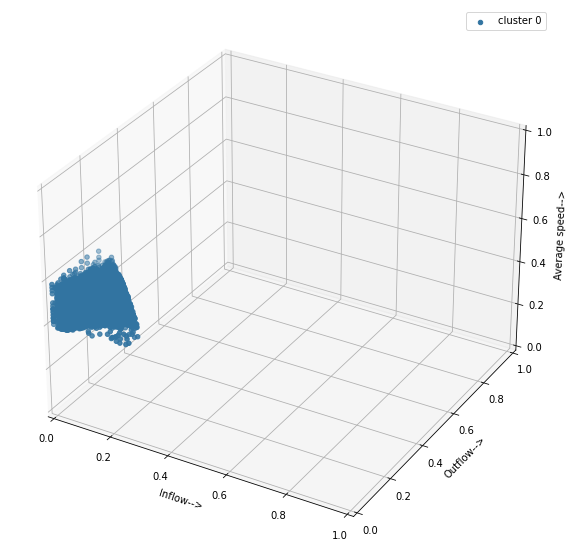

In [8]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 20 , color = '#3274A1', label = "cluster 0")
ax1.set_xlim3d(0,1)
ax1.set_ylim3d(0,1)
ax1.set_zlim3d(0,1)
ax1.set_xlabel('Inflow-->')
ax1.set_ylabel('Outflow-->')
ax1.set_zlabel('Average speed-->')
ax1.legend()
plt.show()

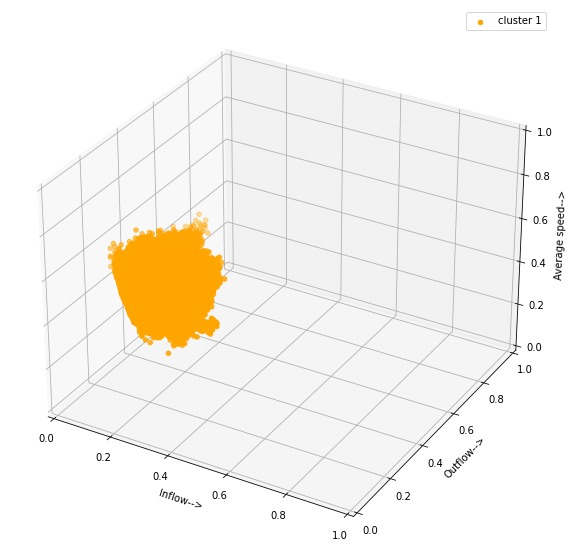

In [9]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 20 , color = 'orange', label = "cluster 1")
ax2.set_xlim3d(0,1)
ax2.set_ylim3d(0,1)
ax2.set_zlim3d(0,1)
ax2.set_xlabel('Inflow-->')
ax2.set_ylabel('Outflow-->')
ax2.set_zlabel('Average speed-->')
ax2.legend()
plt.show()

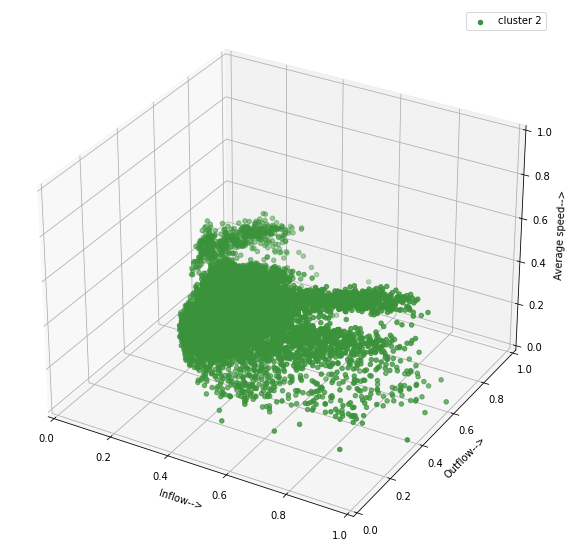

In [10]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 20 , color = '#3A923A', label = "cluster 2")
ax3.set_xlim3d(0,1)
ax3.set_ylim3d(0,1)
ax3.set_zlim3d(0,1)
ax3.set_xlabel('Inflow-->')
ax3.set_ylabel('Outflow-->')
ax3.set_zlabel('Average speed-->')
ax3.legend()
plt.show()

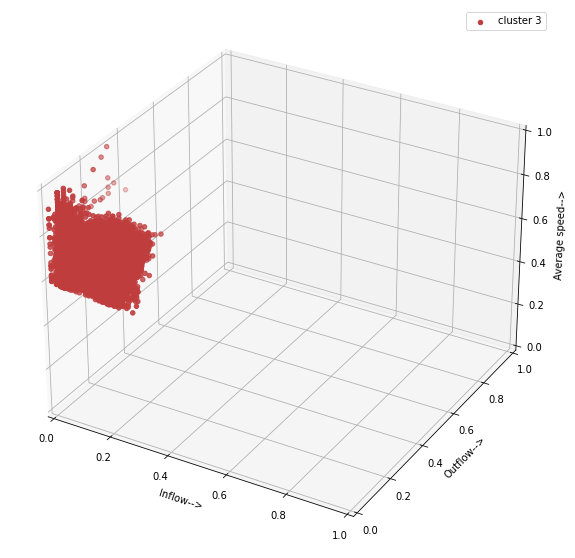

In [11]:
fig4 = plt.figure(figsize = (10,10))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 20 , color = '#C03D3E', label = "cluster 3")
ax4.set_xlim3d(0,1)
ax4.set_ylim3d(0,1)
ax4.set_zlim3d(0,1)
ax4.set_xlabel('Inflow-->')
ax4.set_ylabel('Outflow-->')
ax4.set_zlabel('Average speed-->')
ax4.legend()
plt.show()

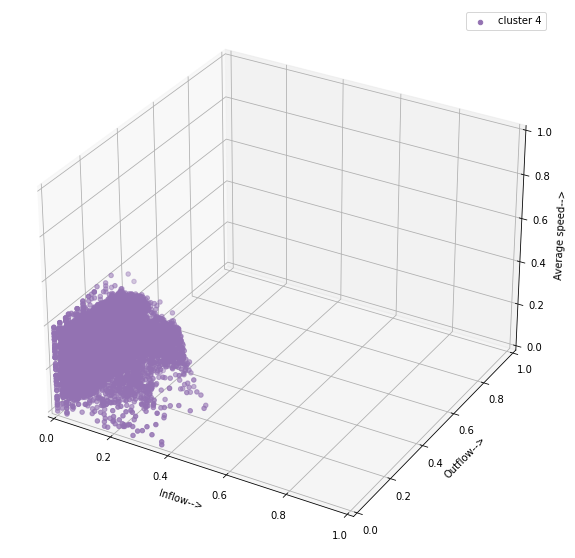

In [12]:
fig5 = plt.figure(figsize = (10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 20 , color = '#9372B2', label = "cluster 4")
ax5.set_xlim3d(0,1)
ax5.set_ylim3d(0,1)
ax5.set_zlim3d(0,1)
ax5.set_xlabel('Inflow-->')
ax5.set_ylabel('Outflow-->')
ax5.set_zlabel('Average speed-->')
ax5.legend()
plt.show()

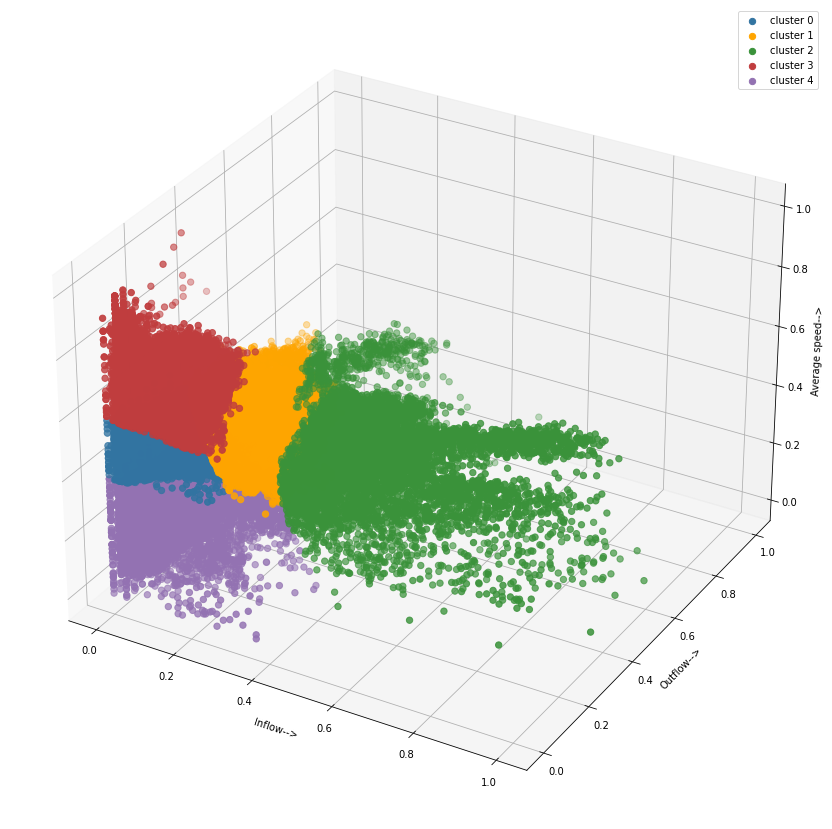

In [13]:
fig6 = plt.figure(figsize = (15,15))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = '#3274A1', label = "cluster 0")
ax6.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax6.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = '#3A923A', label = "cluster 2")
ax6.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#C03D3E', label = "cluster 3")
ax6.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = '#9372B2', label = "cluster 4")
# ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
# ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = 'yellow', label = "cluster 6")
ax6.set_xlabel('Inflow-->')
ax6.set_ylabel('Outflow-->')
ax6.set_zlabel('Average speed-->')
ax6.legend()
plt.show()

In [15]:
# df.to_csv("../dataset/cluster/2020-02-road7-in-5clusterp.csv",index=False)